In [123]:
import tensorflow as tf
import numpy as np
from pyDOE.doe_lhs import lhs
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from pinn import PINN, Constraint

# Second Order Linear ODE (Damped Oscillator):
* The ODE that will be solved has the following form:

$$ \frac{d^2 y}{d x^2} + 2\frac{d y}{d x} + (\pi^2 + 1)y = 0 $$

* And the initial conditions are as follows:

$$ y(0) =  1,\text{    }\frac{d y}{d x}(0) = \pi $$

* The solution for the problem is: 
$$ y(x) = e^{-x}sin(\pi x)$$

In [103]:
def ic0_residual(phi, stack):
    return stack[0] - 0

def ic1_residual(phi, stack):
    return stack[1][:,0] - np.pi

def de_residual(phi, stack):
    return stack[2][:,0,0] + 2 * stack[1][:,0] + (np.pi**2 + 1) * stack[0]

ic0_constraint = Constraint([[0]], ic0_residual)
ic1_constraint = Constraint([[0]], ic1_residual)
de_constraint = Constraint(2*np.pi * lhs(1, 1000), de_residual)

oscillator = tf.keras.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(16, activation='tanh'), # !!!
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1)
])

epochs = 15000
learning_rate = 5e-4

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

pinn = PINN(oscillator)
pinn.constraints = [de_constraint, ic0_constraint, ic1_constraint]
pinn.compile(optimizer, loss, ['mae'], order=2)
pinn.fit(epochs=epochs)

Training loss at epoch 0: 26.8226
Training loss at epoch 1000: 0.7551
Training loss at epoch 2000: 0.1430
Training loss at epoch 3000: 0.0531
Training loss at epoch 4000: 0.0236
Training loss at epoch 5000: 0.0177
Training loss at epoch 6000: 0.0066
Training loss at epoch 7000: 0.0029
Training loss at epoch 8000: 0.0024
Training loss at epoch 9000: 0.0022
Training loss at epoch 10000: 0.0019
Training loss at epoch 11000: 0.0015
Training loss at epoch 12000: 0.0010
Training loss at epoch 13000: 0.0007
Training loss at epoch 14000: 0.0005


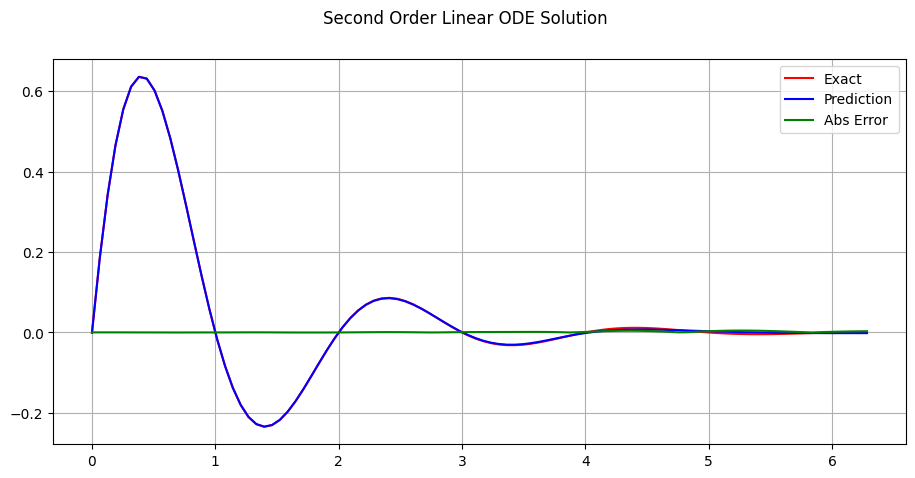

In [107]:
x_test = np.linspace(0, 2*np.pi, 100).reshape((100,1))
y_true = np.exp(-x_test)*np.sin(np.pi * x_test)
y_pred = oscillator(x_test)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(11, 5)
fig.suptitle('Second Order Linear ODE Solution')
ax.plot(x_test, y_true, 'r-', label='Exact')
ax.plot(x_test, y_pred, 'b-', label='Prediction')
ax.plot(x_test, np.abs(y_true - y_pred), 'g-', label='Abs Error')
ax.legend(loc='best')
ax.grid(True)

# Schrödinger Equations
* The equations have the following form:
$$ -\frac{1}{2}\frac{d^2 \phi}{d x^2} + V(x) = E\phi $$
$$ V(x) = \frac{1}{2} \omega^2 x^2 \phi $$
$$ \omega = .5, E = 2.75 $$
* Initial conditions are:
$$ \phi(x) = 0, \phi'(x) = 0.86 $$

In [92]:
def de_residual(phi, stack):
    omega = 0.5
    E = 2.75
    V = 0.5 * omega**2 * phi**2
    return -0.5*stack[2][:,0,0] + (V - E)*stack[0] 

def ic0_residual(phi, stack):
    return stack[0] - 0

def ic1_residual(phi, stack):
    return stack[1][:,0] - 0.86

ic0_constraint = Constraint([[0]], ic0_residual)
ic1_constraint = Constraint([[0]], ic1_residual)
de_constraint = Constraint(20.0 * lhs(1, 100) - np.full((100, 1), 10), de_residual)

scrodinger = tf.keras.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(1)
])

epochs = 30000
learning_rate = 5e-3

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

pinn = PINN(scrodinger)
pinn.constraints = [de_constraint, ic0_constraint, ic1_constraint]
pinn.compile(optimizer, loss, ['mae'], order=2)
pinn.fit(epochs=epochs)

Training loss at epoch 0: 1.3226
Training loss at epoch 1000: 0.0173
Training loss at epoch 2000: 0.0139
Training loss at epoch 3000: 0.0090
Training loss at epoch 4000: 0.0060
Training loss at epoch 5000: 0.0052
Training loss at epoch 6000: 0.0039
Training loss at epoch 7000: 0.0026
Training loss at epoch 8000: 0.0019
Training loss at epoch 9000: 0.0013
Training loss at epoch 10000: 0.0009
Training loss at epoch 11000: 0.0007
Training loss at epoch 12000: 0.0005
Training loss at epoch 13000: 0.0003
Training loss at epoch 14000: 0.0004
Training loss at epoch 15000: 0.0003
Training loss at epoch 16000: 0.0002
Training loss at epoch 17000: 0.0001
Training loss at epoch 18000: 0.0001
Training loss at epoch 19000: 0.0001
Training loss at epoch 20000: 0.0001
Training loss at epoch 21000: 0.0001
Training loss at epoch 22000: 0.0001
Training loss at epoch 23000: 0.0001
Training loss at epoch 24000: 0.0001
Training loss at epoch 25000: 0.0001
Training loss at epoch 26000: 0.0001
Training loss 

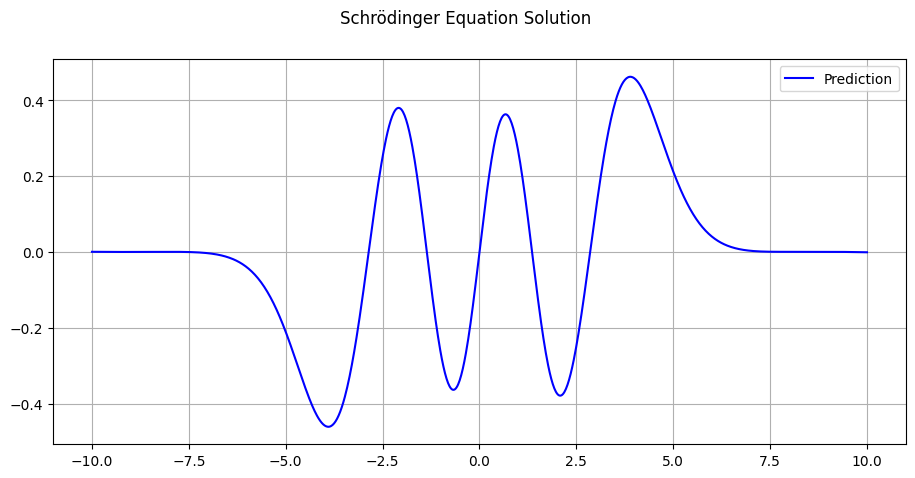

In [106]:
x_test = np.linspace(-10, 10, 1000).reshape((1000,1))
y_pred = scrodinger(x_test)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(11, 5)
fig.suptitle('Schrödinger Equation Solution')
ax.plot(x_test, y_pred, 'b-', label='Prediction')
ax.legend(loc='best')
ax.grid(True)

# Wave Equation
* Equation has the following form:
$$  \frac{\partial^2 u}{\partial t^2} - \frac{\partial^2 u}{\partial x^2} = 0$$
* Suppose the Initial and Boundary conditions are:

$$ u(0,x) = sin(3\pi x) $$
$$ \frac{\partial u}{\partial t} = 0 $$
$$ u(t,0) = u(t, 1) = 0 $$
* The analytical solution of the problem is:
$$ u(t,x) = sin(3\pi x) cos(3\pi t)$$

In [109]:
# Suppose that phi[0] := t, phi[1] := x

def pde_residual(phi, stack):
    return stack[2][:,0,0] - stack[2][:,1,1]

def ic0_residual(phi, stack):
    return stack[0] - tf.sin(3.0 * np.pi *  phi[:,1:])

def ic1_residual(phi, stack):
    return stack[1][:,0] - 0

def bc_residual(phi, stack):
    return stack[0] - 0

pde_con = Constraint(lhs(2, 100), pde_residual)
ic0_con = Constraint(np.array([0, 1]) * lhs(2, 100), ic0_residual)
ic1_con = Constraint(np.array([0, 1]) * lhs(2, 100), ic1_residual)
bc0_con = Constraint(np.array([1, 0]) * lhs(2, 100), bc_residual)
bc1_con = Constraint(np.array([1, 0]) * lhs(2, 100) + np.array([0,1]), bc_residual)


wave = tf.keras.Sequential([
    tf.keras.layers.Input((2,)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1)
])

In [110]:
epochs = 60000
learning_rate = 5e-4

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

pinn = PINN(wave)
pinn.constraints = [pde_con, bc0_con, bc1_con, ic0_con, ic1_con]
pinn.compile(optimizer, loss, ['mae'], order=2)
pinn.fit(epochs=epochs)

Training loss at epoch 0: 0.4963
Training loss at epoch 1000: 0.2278
Training loss at epoch 2000: 0.1900
Training loss at epoch 3000: 0.1413
Training loss at epoch 4000: 0.0609
Training loss at epoch 5000: 0.0419
Training loss at epoch 6000: 0.0308
Training loss at epoch 7000: 0.0242
Training loss at epoch 8000: 0.0216
Training loss at epoch 9000: 0.0155
Training loss at epoch 10000: 0.0128
Training loss at epoch 11000: 0.0105
Training loss at epoch 12000: 0.0082
Training loss at epoch 13000: 0.0064
Training loss at epoch 14000: 0.0049
Training loss at epoch 15000: 0.0144
Training loss at epoch 16000: 0.0034
Training loss at epoch 17000: 0.0036
Training loss at epoch 18000: 0.0028
Training loss at epoch 19000: 0.0030
Training loss at epoch 20000: 0.0051
Training loss at epoch 21000: 0.0017
Training loss at epoch 22000: 0.0017
Training loss at epoch 23000: 0.0017
Training loss at epoch 24000: 0.0014
Training loss at epoch 25000: 0.0018
Training loss at epoch 26000: 0.0020
Training loss 

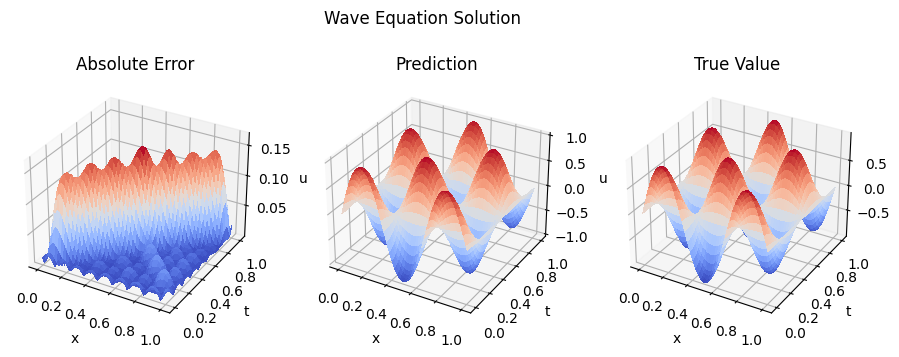

In [114]:
t = np.linspace(0, 1, 100)#.reshape((100,1))
x = np.linspace(0, 1, 100)#.reshape((100,1))
T, X = np.meshgrid(t, x)

z_predict = np.hstack([wave(np.hstack( (T[:,i:i+1], X[:,i:i+1]) )) for i in range(T.shape[1])])
z_true = np.cos(3*np.pi*T) * np.sin(3*np.pi*X)

fig, (ax0, ax1, ax2) = plt.subplots(1,3,subplot_kw={'projection': '3d'})
fig.set_size_inches(11, 4)
fig.suptitle('Wave Equation Solution')

ax0.set(xlabel='x', ylabel='t', zlabel='u', title='Absolute Error')
ax1.set(xlabel='x', ylabel='t', zlabel='u', title='Prediction')
ax2.set(xlabel='x', ylabel='t', zlabel='u', title='True Value')

surf = ax0.plot_surface(X, T, np.abs(z_true-z_predict), linewidth=0, antialiased=False, cmap=cm.coolwarm)
surf = ax1.plot_surface(X, T, z_predict, linewidth=0, antialiased=False, cmap=cm.coolwarm)
surf = ax2.plot_surface(X, T, z_true, linewidth=0, antialiased=False, cmap=cm.coolwarm)


# Burger's Equation

* A particular Burger's Equation has the following form:
$$  \frac{\partial u}{\partial t} +  u \frac{\partial u}{\partial x} - \frac{1}{4}\frac{\partial^2 u}{\partial x^2} = 0$$
* Suppose the Initial and Boundary conditions are:

$$ u(0,x) = x(1-x) $$
$$ u(t,0) = u(t, 1) = 0 $$

In [115]:
def pde_residual(phi, stack):
    return stack[1][:,0] + stack[0] * stack[1][:,1] - 0.25 * stack[2][:,0,0]

def ic_residual(phi, stack):
    return stack[0] - phi[:,1:] * (1 - phi[:,1:])

def bc_residual(phi, stack):
    return stack[0] - 0

pde_con = Constraint(lhs(2, 100), pde_residual)
ic_con = Constraint(np.array([0, 1]) * lhs(2, 100), ic0_residual)
bc0_con = Constraint(np.array([1, 0]) * lhs(2, 100), bc_residual)
bc1_con = Constraint(np.array([1, 0]) * lhs(2, 100) + np.array([0,1]), bc_residual)

burger = tf.keras.Sequential([
    tf.keras.layers.Input((2,)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1)
])

epochs = 60000
learning_rate = 5e-4

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

pinn = PINN(burger)
pinn.constraints = [pde_con, bc0_con, bc1_con, ic0_con, ic1_con]
pinn.compile(optimizer, loss, ['mae'], order=2)
pinn.fit(epochs=epochs)

Training loss at epoch 0: 0.6113
Training loss at epoch 1000: 0.3103
Training loss at epoch 2000: 0.1759
Training loss at epoch 3000: 0.0657
Training loss at epoch 4000: 0.0442
Training loss at epoch 5000: 0.0333
Training loss at epoch 6000: 0.0217
Training loss at epoch 7000: 0.0105
Training loss at epoch 8000: 0.0054
Training loss at epoch 9000: 0.0025
Training loss at epoch 10000: 0.0017
Training loss at epoch 11000: 0.0012
Training loss at epoch 12000: 0.0032
Training loss at epoch 13000: 0.0008
Training loss at epoch 14000: 0.0006
Training loss at epoch 15000: 0.0005
Training loss at epoch 16000: 0.0005
Training loss at epoch 17000: 0.0004
Training loss at epoch 18000: 0.0005
Training loss at epoch 19000: 0.0004
Training loss at epoch 20000: 0.0003
Training loss at epoch 21000: 0.0003
Training loss at epoch 22000: 0.0018
Training loss at epoch 23000: 0.0002
Training loss at epoch 24000: 0.0033
Training loss at epoch 25000: 0.0002
Training loss at epoch 26000: 0.0002
Training loss 

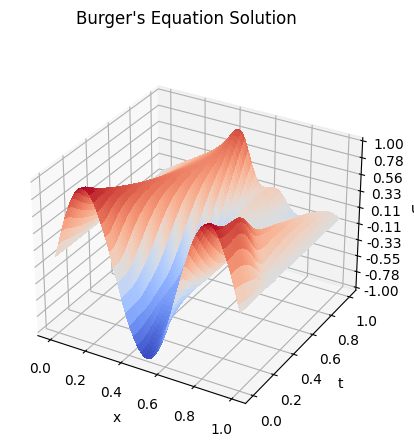

In [126]:
t = np.linspace(0, 1, 100)#.reshape((100,1))
x = np.linspace(0, 1, 100)#.reshape((100,1))
T, X = np.meshgrid(t, x)

z_predict = np.hstack([burger(np.hstack( (T[:,i:i+1], X[:,i:i+1]) )) for i in range(T.shape[1])])

fig, ax1 = plt.subplots(1,1,subplot_kw={'projection': '3d'})
fig.suptitle('Burger\'s Equation Solution')

ax1.set(xlabel='x', ylabel='t', zlabel='u')
ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter('{x:.02f}')

surf = ax1.plot_surface(X, T, z_predict, linewidth=0, antialiased=False, cmap=cm.coolwarm)

# Heat Equation 1

* Here is an example of particular solution to the heat equation:

$$ \frac{\partial u}{\partial t} - 0.05\frac{\partial^2 u}{\partial x^2} = 0$$
$$ u(0,x) = sin(3\pi x) $$
$$ \frac{\partial u}{\partial x}\bigg|_{\partial \Omega} = 0 $$

* The analytical solution is:

$$ u(t,x) = cos(3\pi x)e^{-.05(3\pi)^2t} $$

In [144]:
def pde_residual(phi, stack):
    return stack[1][:,0] - 0.05 * stack[2][:,1,1]

def ic_residual(phi, stack):
    return stack[0] - tf.sin(3.0 * np.pi *  phi[:,1:])

def bc_residual(phi, stack):
    return stack[1][:,1] - 0

pde_con = Constraint(lhs(2, 100), pde_residual)
ic_con = Constraint(np.array([0, 1]) * lhs(2, 100), ic_residual)
bc0_con = Constraint(np.array([1, 0]) * lhs(2, 100), bc_residual)
bc1_con = Constraint(np.array([1, 0]) * lhs(2, 100) + np.array([0,1]), bc_residual)


heat1 = tf.keras.Sequential([
    tf.keras.layers.Input((2,)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1)
])

epochs = 25000
learning_rate = 5e-4

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

pinn = PINN(heat1)
pinn.constraints = [pde_con, bc0_con, bc1_con, ic_con]
pinn.compile(optimizer, loss, ['mae'], order=2)
pinn.fit(epochs=epochs)

Training loss at epoch 0: 0.5899
Training loss at epoch 1000: 0.0491
Training loss at epoch 2000: 0.0159
Training loss at epoch 3000: 0.0046
Training loss at epoch 4000: 0.0024
Training loss at epoch 5000: 0.0015
Training loss at epoch 6000: 0.0013
Training loss at epoch 7000: 0.0011
Training loss at epoch 8000: 0.0010
Training loss at epoch 9000: 0.0017
Training loss at epoch 10000: 0.0009
Training loss at epoch 11000: 0.0008
Training loss at epoch 12000: 0.0008
Training loss at epoch 13000: 0.0008
Training loss at epoch 14000: 0.0007
Training loss at epoch 15000: 0.0007
Training loss at epoch 16000: 0.0007
Training loss at epoch 17000: 0.0010
Training loss at epoch 18000: 0.0007
Training loss at epoch 19000: 0.0007
Training loss at epoch 20000: 0.0006
Training loss at epoch 21000: 0.0006
Training loss at epoch 22000: 0.0006
Training loss at epoch 23000: 0.0006
Training loss at epoch 24000: 0.0111


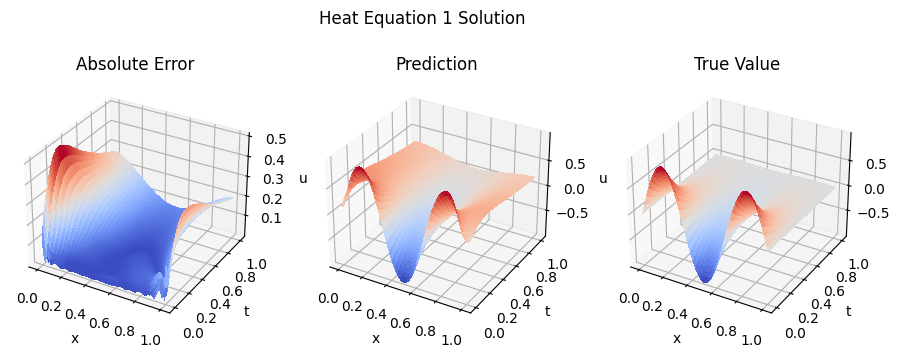

In [145]:
t = np.linspace(0, 1, 100)#.reshape((100,1))
x = np.linspace(0, 1, 100)#.reshape((100,1))
T, X = np.meshgrid(t, x)

z_predict = np.hstack([heat1(np.hstack( (T[:,i:i+1], X[:,i:i+1]) )) for i in range(T.shape[1])])
z_true = np.sin(3*np.pi*X) * np.exp(-0.05*(3*np.pi)**2*T)

fig, (ax0, ax1, ax2) = plt.subplots(1,3,subplot_kw={'projection': '3d'})
fig.set_size_inches(11, 4)
fig.suptitle('Heat Equation 1 Solution')

ax0.set(xlabel='x', ylabel='t', zlabel='u', title='Absolute Error')
ax1.set(xlabel='x', ylabel='t', zlabel='u', title='Prediction')
ax2.set(xlabel='x', ylabel='t', zlabel='u', title='True Value')

surf = ax0.plot_surface(X, T, np.abs(z_true-z_predict), linewidth=0, antialiased=False, cmap=cm.coolwarm)
surf = ax1.plot_surface(X, T, z_predict, linewidth=0, antialiased=False, cmap=cm.coolwarm)
surf = ax2.plot_surface(X, T, z_true, linewidth=0, antialiased=False, cmap=cm.coolwarm)

# Heat Equation 2

* Here is an example of particular solution to the heat equation:

$$ \frac{\partial u}{\partial t} - 0.05\frac{\partial^2 u}{\partial x^2} = 0$$
$$ u(0,x) = 1 $$
$$ u(t,x)|_{\partial \Omega} = 0 $$


In [155]:
def pde_residual(phi, stack):
    return stack[1][:,0] - 0.05 * stack[2][:,1,1]

def ic_residual(phi, stack):
    return stack[0] - 20

def bc_residual(phi, stack):
    return stack[0] - 0

pde_con = Constraint(lhs(2, 100), pde_residual)
ic_con = Constraint(np.array([0, 1]) * lhs(2, 100), ic_residual)
bc0_con = Constraint(np.array([1, 0]) * lhs(2, 100), bc_residual)
bc1_con = Constraint(np.array([1, 0]) * lhs(2, 100) + np.array([0,1]), bc_residual)


heat2 = tf.keras.Sequential([
    tf.keras.layers.Input((2,)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1)
])

epochs = 35000
learning_rate = 2e-4

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

pinn = PINN(heat2)
pinn.constraints = [pde_con, bc0_con, bc1_con, ic_con]
pinn.compile(optimizer, loss, ['mae'], order=2)
pinn.fit(epochs=epochs)

Training loss at epoch 0: 406.3201
Training loss at epoch 1000: 201.4961
Training loss at epoch 2000: 88.6893
Training loss at epoch 3000: 31.5142
Training loss at epoch 4000: 10.2901
Training loss at epoch 5000: 2.4596
Training loss at epoch 6000: 0.5617
Training loss at epoch 7000: 0.2438
Training loss at epoch 8000: 0.1395
Training loss at epoch 9000: 0.0865
Training loss at epoch 10000: 0.0575
Training loss at epoch 11000: 0.0377
Training loss at epoch 12000: 0.0269
Training loss at epoch 13000: 0.0187
Training loss at epoch 14000: 0.0136
Training loss at epoch 15000: 0.0104
Training loss at epoch 16000: 0.0083
Training loss at epoch 17000: 0.0069
Training loss at epoch 18000: 0.0059
Training loss at epoch 19000: 0.0072
Training loss at epoch 20000: 0.0067
Training loss at epoch 21000: 0.0042
Training loss at epoch 22000: 0.0044
Training loss at epoch 23000: 0.0036
Training loss at epoch 24000: 0.0034
Training loss at epoch 25000: 0.0034
Training loss at epoch 26000: 0.0042
Trainin

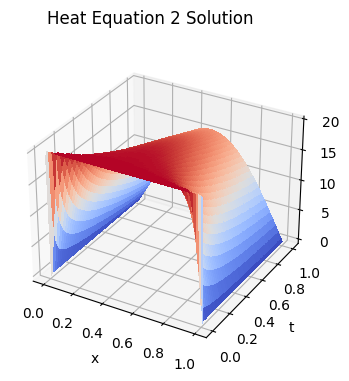

In [156]:
t = np.linspace(0, 1, 100)#.reshape((100,1))
x = np.linspace(0, 1, 100)#.reshape((100,1))
T, X = np.meshgrid(t, x)

z_predict = np.hstack([heat2(np.hstack( (T[:,i:i+1], X[:,i:i+1]) )) for i in range(T.shape[1])])

fig, ax1 = plt.subplots(1,1,subplot_kw={'projection': '3d'})
fig.set_size_inches(11, 4)
fig.suptitle('Heat Equation 2 Solution')

ax1.set(xlabel='x', ylabel='t', zlabel='u')

surf = ax1.plot_surface(X, T, z_predict, linewidth=0, antialiased=False, cmap=cm.coolwarm)
